# Table of Contents

### 1. Problem Statement
### 2. Importing Libraries
### 3. Data Acquisition & Description
### 4. Data Pre-Processing
### 5. Exploratory Data Analysis

# 1.Problem Statement

# 2.Importing Libraries

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings                                                     
warnings.filterwarnings("ignore")  

from sklearn.metrics import accuracy_score      
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split                    
from sklearn.linear_model import LogisticRegression 


# 3.Data Acquisition & Description 

In [84]:
#Importing dataset
train=pd.read_csv("Churn_train.csv")
test=pd.read_csv("Churn_test.csv")
data=pd.merge(train,test,how="outer")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [85]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 4.Data Pre-Processing

In [87]:
data.duplicated().any()

False

In [88]:
data.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn               1409
dtype: int64

In [89]:
#Total charges contains ' ',it is replaced with 0 and converted to type float

data['TotalCharges']=data['TotalCharges'].replace(to_replace =[' '],value =0).apply(float)
test['TotalCharges']=test['TotalCharges'].replace(to_replace =[' '],value =0).apply(float)
train['TotalCharges']=train['TotalCharges'].replace(to_replace =[' '],value =0).apply(float)

# 5.Exploratory Data Analysis

<b>Question: What is the frequency and proportion of Churn?</b>

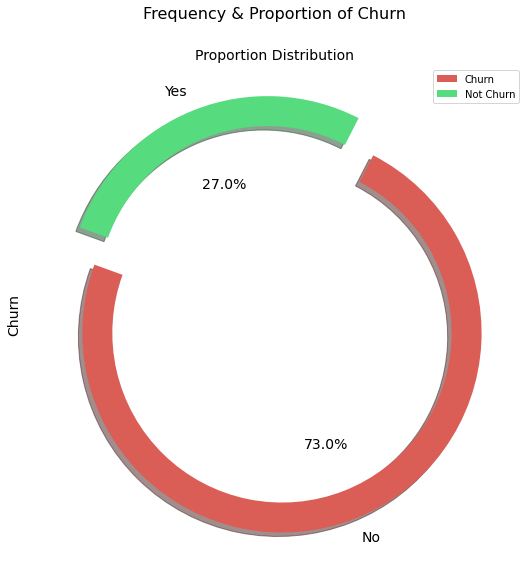

In [90]:
fig=plt.figure(figsize=[10,20])
space = np.ones(2)/10
data['Churn'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#DB5E56','#56DB7F'])
plt.legend(['Churn', 'Not Churn'])
plt.ylabel('Churn',size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Churn', y = 1.02, size = 16)
plt.show()

<b> Question:Relation between monthly charges and churn ?</b>

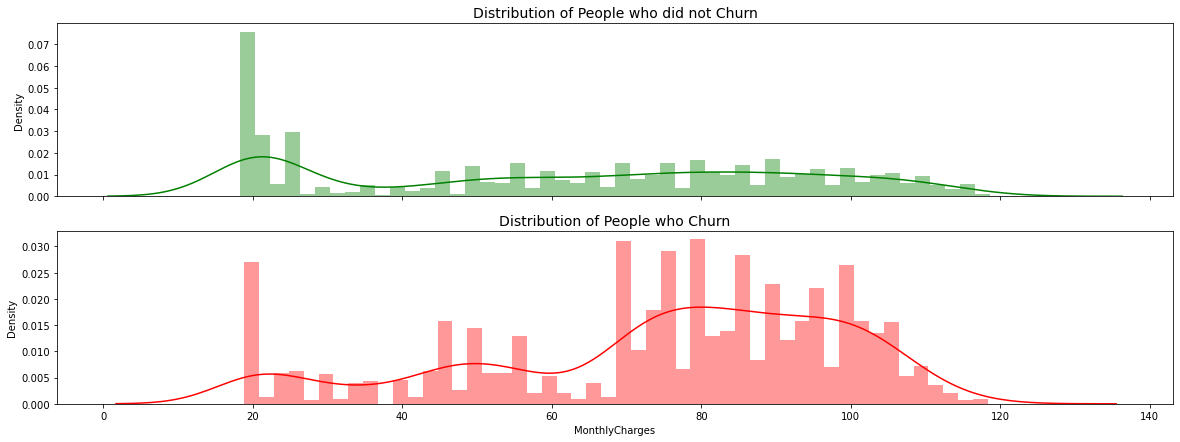

In [91]:
a=data['MonthlyCharges'][data['Churn']=='No']
b=data['MonthlyCharges'][data['Churn']=='Yes']
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
sns.distplot(a, bins = 50, ax = ax1, color = 'green')
ax1.set_title(label = 'Distribution of People who did not Churn', size = 14)
ax1.set_xlabel(xlabel = '')
sns.distplot(b, bins = 50, ax = ax2, color = 'red')
ax2.set_title(label = 'Distribution of People who Churn', size = 14)
plt.show()

<b> Question:Relation between Contract period charges and churn ?</b>

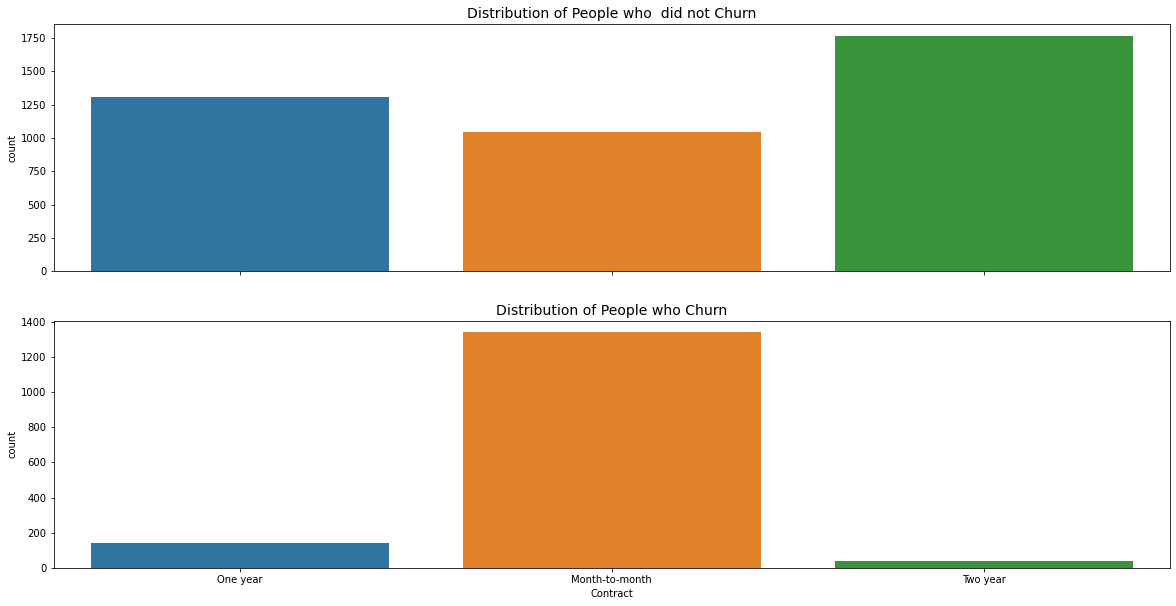

In [92]:
c = data['Contract'][data['Churn']=='No']
d=data['Contract'][data['Churn']=='Yes']
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 10))
sns.countplot(c,ax=ax1)
ax1.set_title(label = 'Distribution of People who  did not Churn', size = 14)
ax1.set_xlabel(xlabel = '')
sns.countplot(d,ax=ax2)
ax2.set_title(label = 'Distribution of People who Churn', size = 14)
plt.show()

<b> Question:Correlation between the features ?</b>

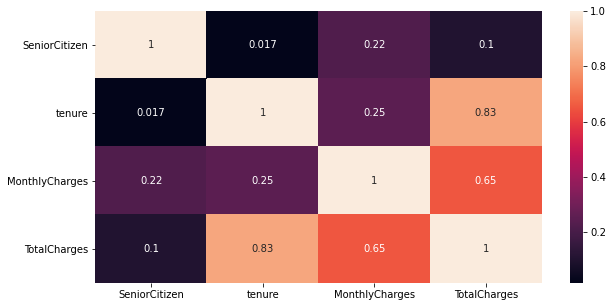

In [93]:
fig=plt.figure(figsize=[10,5])
sns.heatmap(data=data.corr(),annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x12bb8740190>,
 'caps': [<matplotlib.lines.Line2D at 0x12bb8749100>,
 'boxes': [<matplotlib.lines.Line2D at 0x12bb8740580>],
 'medians': [<matplotlib.lines.Line2D at 0x12bb99ac5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12bb99ac1f0>],
 'means': []}

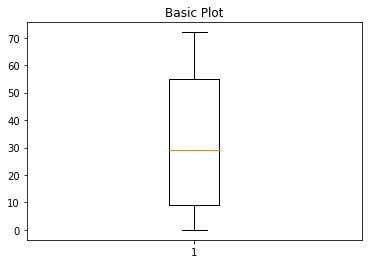

In [94]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data.tenure)

# 6.Data Post-Processing

### Encoding Categorical Features

In [99]:
# SeniorCitizen is a categorical feature so converting it to object type
train['SeniorCitizen'] = train.SeniorCitizen.astype(dtype=object)



X=train.drop(['Churn','customerID'],axis=1)
y=train['Churn']

train=data.apply(LabelEncoder().fit_transform)

### Splitting Data

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (5634, 19) (5634,)
Testing Data Shape: (1409, 19) (1409,)


### Scaling

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_features=X_train[['TotalCharges','MonthlyCharges','tenure']].columns
X_train[num_features]=scaler.fit_transform(X_train[num_features])
X_test[num_features]=scaler.transform(X_test[num_features])

# 7. Model Development and Evaluation                

In [102]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression()

In [103]:
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [109]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))

from sklearn.metrics import classification_report
print("Test data",classification_report(y_test,y_pred_test))
print("Train data",classification_report(y_train,y_pred_train))

Accuracy score for test data is: 0.6444286728176012
Accuracy score for train data is: 0.6419950301739439
Test data               precision    recall  f1-score   support

           0       0.68      0.92      0.78       836
           1       0.49      0.48      0.49       283
           2       0.00      0.00      0.00       290

    accuracy                           0.64      1409
   macro avg       0.39      0.47      0.42      1409
weighted avg       0.50      0.64      0.56      1409

Train data               precision    recall  f1-score   support

           0       0.66      0.91      0.77      3277
           1       0.55      0.52      0.54      1238
           2       0.00      0.00      0.00      1119

    accuracy                           0.64      5634
   macro avg       0.41      0.48      0.43      5634
weighted avg       0.51      0.64      0.56      5634



In [106]:
output=pd.DataFrame(test.customerID)
output['Churn']=y_pred_test
output['Churn']=output['Churn'].replace(to_replace =[1,0],value =['Yes','No'])
output.to_csv('submission.csv',index=False,header=False)